## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [268]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm

import json
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'median', 'isreal', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


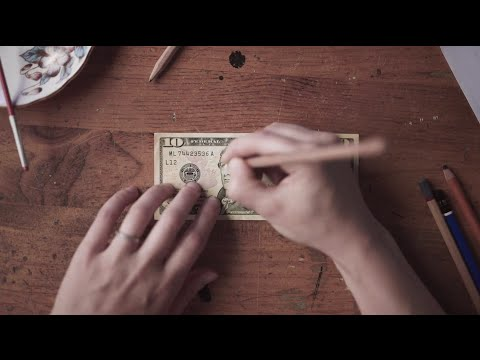

In [269]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

#### the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm
##### Data Resource From Professor Bianco : 
http://cosmo.nyu.edu/~fb55/PUI2016/data

## First, in order to conduct analysis on Gender Income Gap, the data has to be obtain. 


In [270]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

#### Set up two dictionaries to store data

In [271]:
#For male
allmales = {}
allmales['all'] = pd.read_excel(url + "pinc" + "08_2" + "_1_1" + ".xls", header=9)
allmales['white'] = pd.read_excel(url + "pinc" + "08_2" + "_1_4" + ".xls" ,header=9 )
allmales['black'] = pd.read_excel(url + "pinc" + "08_2" + "_1_6" + ".xls", header=9)
allmales['asian'] = pd.read_excel(url + "pinc" + "08_2" + "_1_8" + ".xls", header=9)
allmales['hispanic'] = pd.read_excel(url + "pinc" + "08_2" + "_1_9" + ".xls", header=9)


In [272]:
#For Female
allfemales = {}
allfemales['all'] = pd.read_excel(url + "pinc" + "08_3" + "_1_1" + ".xls", header=9)
allfemales['white'] = pd.read_excel(url + "pinc" + "08_3" + "_1_4" + ".xls", header=9)
allfemales['black'] = pd.read_excel(url + "pinc" + "08_3" + "_1_6" + ".xls", header=9)
allfemales['asian'] = pd.read_excel(url + "pinc" + "08_3" + "_1_8" + ".xls", header=9)
allfemales['hispanic'] = pd.read_excel(url + "pinc" + "08_3" + "_1_9" + ".xls", header=9)


In [273]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [274]:
allfemales['all'].head(200)


,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162
5,..Farm Self-Employment,774.0,592.0,57.0,0.0,21.0,18.0,4.0,4.0,0.0,...,0.0,0.0,0.0,15.0,1635,65,7908,2005,0.916,0.0148
6,Social Security,26923.0,770.0,1294.0,2750.0,5261.0,5022.0,4252.0,2990.0,1924.0,...,0.0,0.0,0.0,0.0,11686,70,12453,71,0.258,0.0025
7,SSI (Supplemental Security Income),3386.0,515.0,559.0,363.0,1428.0,232.0,130.0,72.0,30.0,...,0.0,0.0,0.0,0.0,7950,71,7316,129,0.315,0.0088
8,Public Assistance,1541.0,759.0,409.0,257.0,74.0,9.0,17.0,5.0,3.0,...,0.0,0.0,0.0,0.0,2569,180,3413,149,0.464,0.0139
9,Veterans Benefits,619.0,79.0,58.0,48.0,68.0,56.0,113.0,49.0,31.0,...,0.0,0.0,6.0,0.0,12501,760,13839,927,0.42,0.0288


In [275]:
# take a look of all the columns
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

# 1. Descriptive phase: 


In [276]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

----


# 2. Exploratory phase


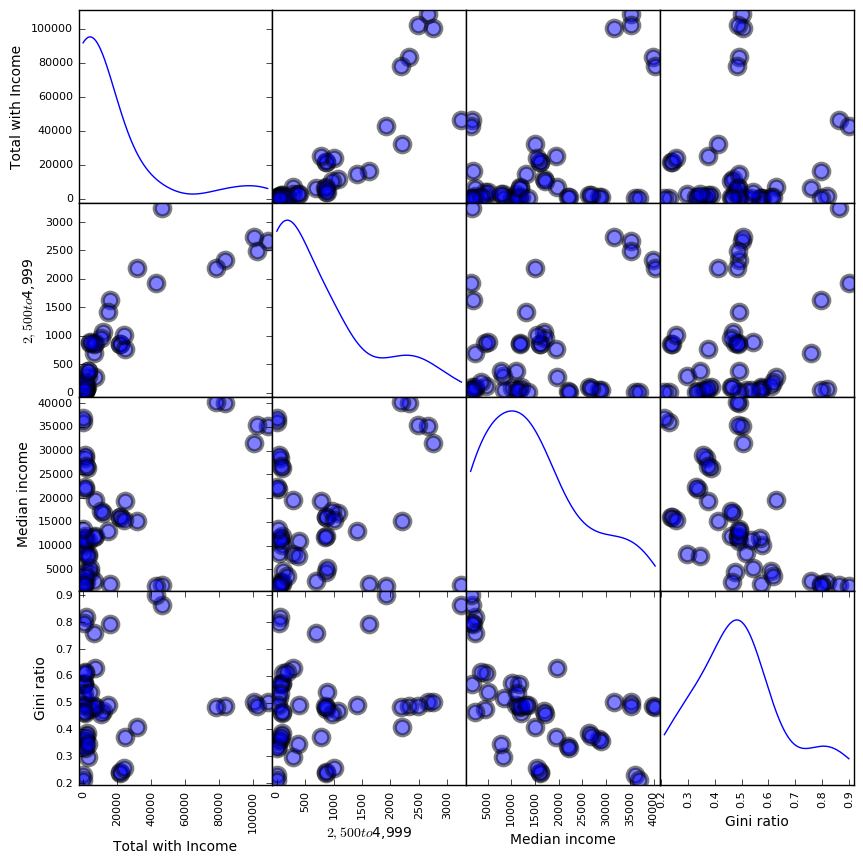

In [388]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(10,10), 
                        diagonal='kde')                



### As we are tying to plot this scatter matirx with four elements, as Total with Income, 2500-4999, Median income, and Gini ratio. However, we only see Total with income and 2500 to 4999 got ploted. This is because there are a lot of bad(meaningless ) values in the Median income and Gini ratio column. 
### From what we have in the graph, we can identify that there is some linear correlation between Total with Income and 2500 to 4999.

In [278]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [279]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help us to clean up 

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## After clean up now, we can re-plot the dataframe values with a scatter matrix plot. 

### 1. allmales


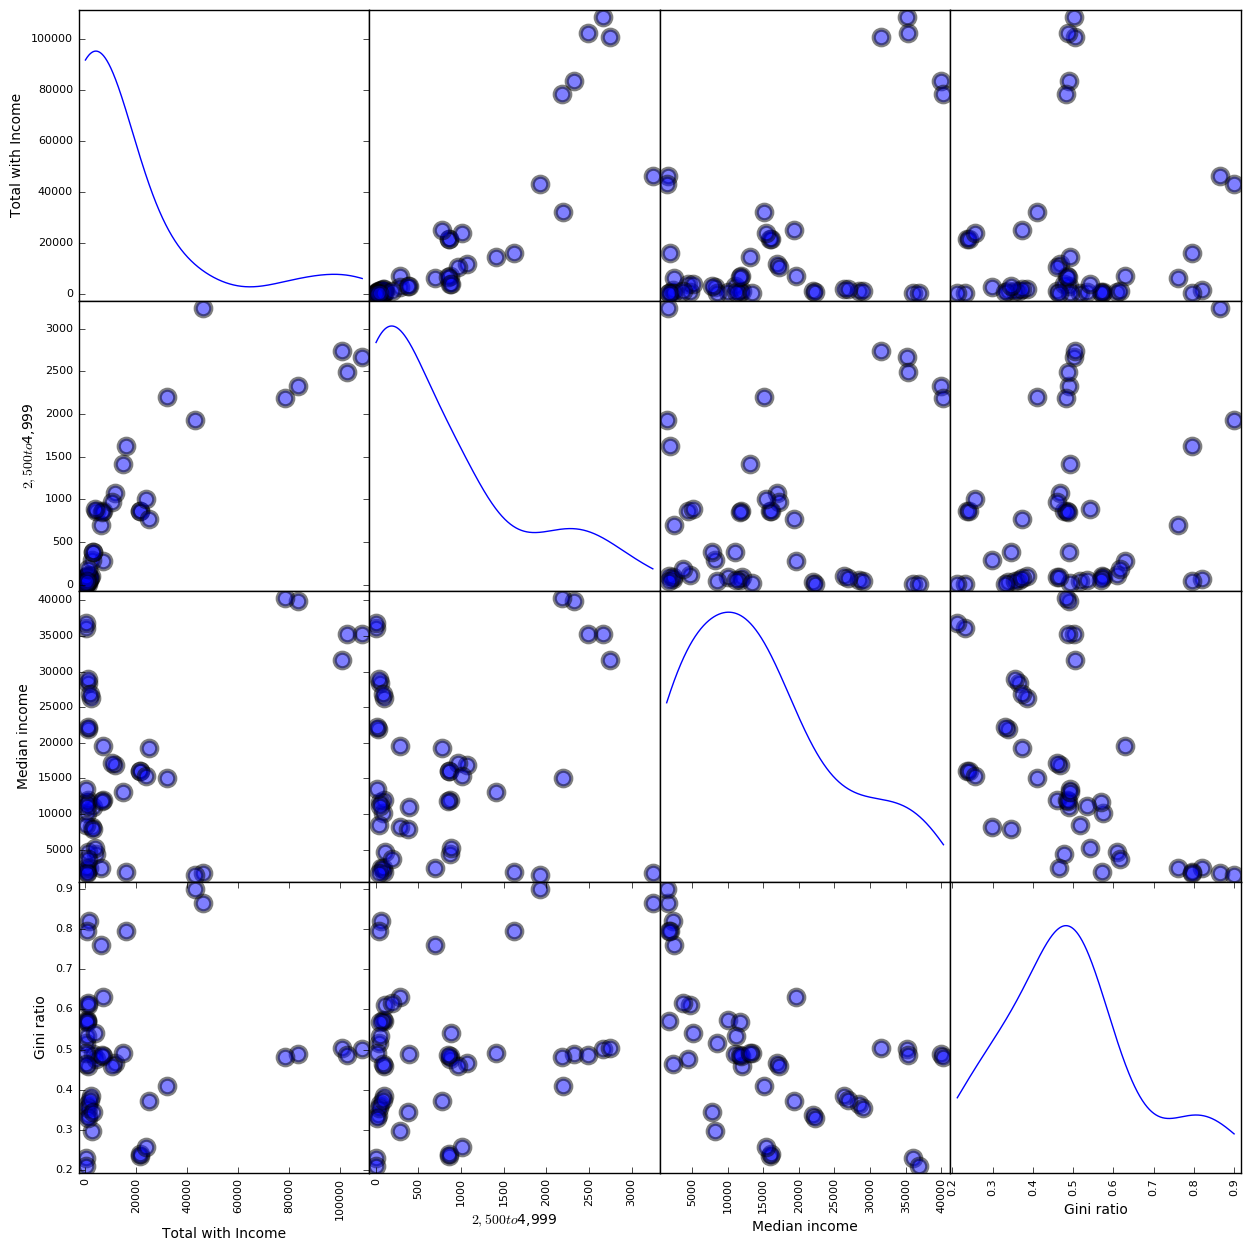

In [280]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')     

##### The Gini index is a measurement of the income distribution of a country's residents. This number, which ranges between 0 and 1 and is based on residents' net income, helps define the gap between the rich and the poor, with 0 representing perfect equality and 1 representing perfect inequality.

### From the plot, It seems that the higher the Median Income, the lower Gini ratio. 


### 2. allfemales

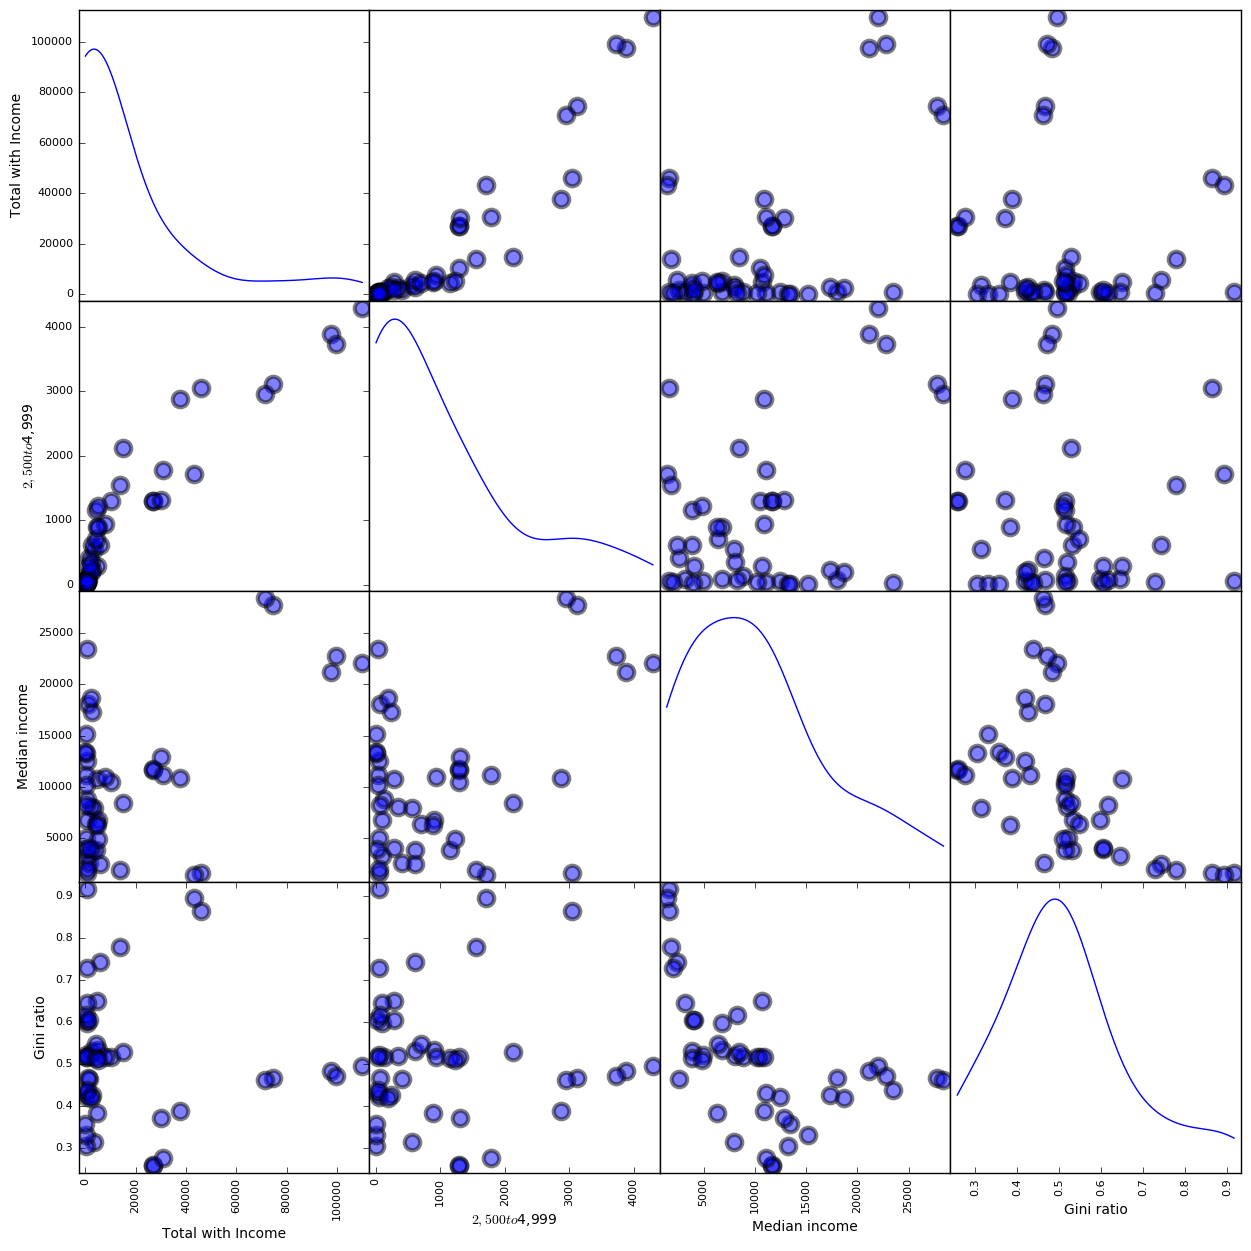

In [281]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

## From the plot, It is hard to identify any relationship between the variables.

---


## 3. More Exploration: to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)


In [282]:
allfemales["all"].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063.0,137.0,31968.0,250.0,0.495,0.0025
2,NaN,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736.0,364.0,36189.0,307.0,0.466,0.0032
3,NaN,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402.0,379.0,36412.0,316.0,0.461,0.0032
4,NaN,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732.0,399.0,20942.0,1123.0,0.650,0.0162


In [283]:
#Total Median Income is the second row
median_female = []
median_male = []
for i in allfemales:
    median_female.append(allfemales[i].loc[1]["Median income"])
    median_male.append(allmales[i].loc[1]["Median income"])
    

In [284]:
print (median_female, median_male)

[17762.0, 22063.0, 20044.0, 23780.0, 24840.0] [25411.0, 35228.0, 24855.0, 40122.0, 40153.0]


In [285]:
median_female = np.array(median_female)
median_male = np.array(median_male)

In [286]:
allfemales.keys()

['hispanic', 'all', 'black', 'white', 'asian']

In [287]:
#color list
list = ["r","b","g","k","y"]

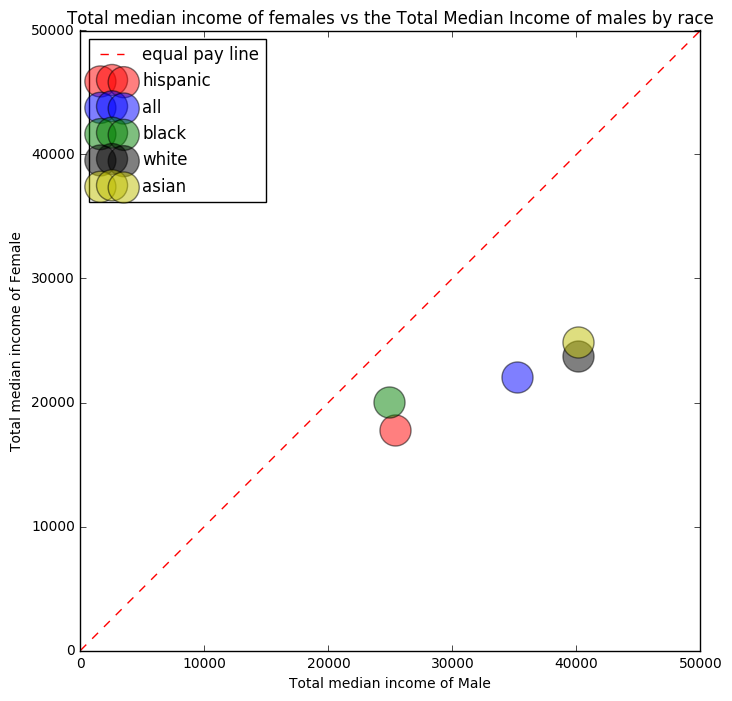

In [290]:
##plotting the Total median income by race


f, ax = plt.subplots(figsize = (8,8))

for i in range(5):
    plt.scatter(median_male[i], median_female[i], marker = "o", alpha = 0.5, s = 500, 
                c = list[i],label = allfemales.keys()[i] )
ax.set_xlabel("Total median income of Male")
ax.set_ylabel("Total median income of Female")
plt.ylim(0,50000)
plt.xlim(0,50000)

ax.plot([0,50000],[0,50000],"r--", label="equal pay line" )
pl.title("Total median income of females vs the Total Median Income of males by race")
pl.legend(loc=2)


## Plotting the Total median income by race. From the graph, because of the dignoal line, we can easily tell that all the points below the dignoal line, means the Total median income of Male of all races is more than any race of females.
## Also, the white and asian are the most paid races. The difference between races of Male on income is relatively larger than the difference between races of Female.


-----

# 4. Data Analysis Part. 
## First, we will fit the data with a line.


In [291]:
y = median_female
x = median_male

In [292]:
X = sm.add_constant(x)

In [293]:
regress = sm.OLS(y,x)

In [294]:
modelfit = regress.fit()

In [295]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     395.4
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           3.77e-05
Time:                        12:16:56   Log-Likelihood:                -45.545
No. Observations:                   5   AIC:                             93.09
Df Residuals:                       4   BIC:                             92.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6423      0.032     19.885      0.000         0.553     0.732
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.657
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.564
Skew:                           0.680   Prob(JB):                        0.754
Kurtosis:                       2.072   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
x_new = np.arange(0, 50000, 1)

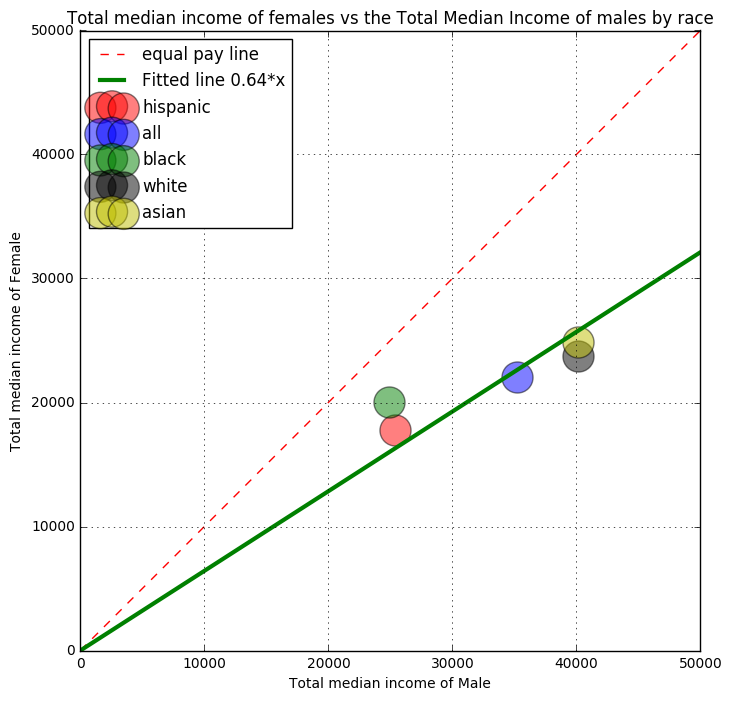

In [354]:
f, ax = plt.subplots(figsize = (8,8))

for i in range(5):
    plt.scatter(median_male[i], median_female[i], marker = "o", alpha = 0.5, s = 500, 
                c = list[i],label = allfemales.keys()[i] )
ax.set_xlabel("Total median income of Male")
ax.set_ylabel("Total median income of Female")
plt.ylim(0,50000)
plt.xlim(0,50000)

ax.plot([0,50000],[0,50000],"r--", label="equal pay line" )
ax.plot(x_new, modelfit.predict(x_new), "g-",linewidth= 3, label="Fitted line %.2f*x"%modelfit.params )
pl.title("Total median income of females vs the Total Median Income of males by race")
pl.legend(loc=2)
pl.grid()


## From the graph above, the green solid line is the fitted line by OLS regression by using OLS statsmodel. Y = 0.64X, through out the (0,0)

--------


## There is an analytical solution for the OLS (ordinary least square) regression which is coded below. 


In [305]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta = beta0, beta1
beta

(2224.3609760454674, 0.57394829035421091)

## Remake the scatter plot, with both the line fit as well as the analytical solution to compare that with the result of numerical one (a line is y = beta0 + beta1 * x)

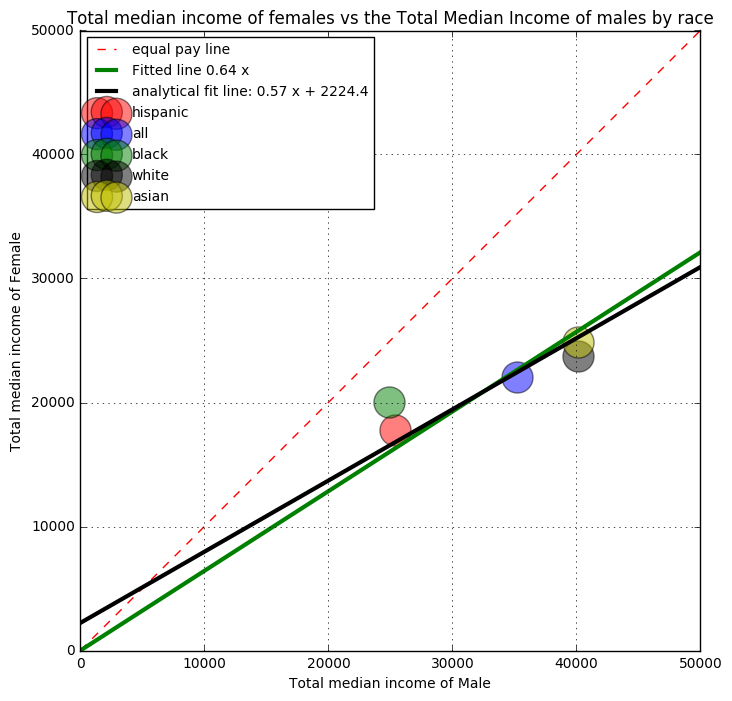

In [355]:
f, ax = plt.subplots(figsize = (8,8))

for i in range(5):
    plt.scatter(median_male[i], median_female[i], marker = "o", alpha = 0.5, s = 500, 
                c = list[i],label = allfemales.keys()[i] )
ax.set_xlabel("Total median income of Male")
ax.set_ylabel("Total median income of Female")
plt.ylim(0,50000)
plt.xlim(0,50000)

ax.plot([0,50000],[0,50000],"r--",label="equal pay line" )
ax.plot(x_new, modelfit.predict(x_new), "g-", linewidth= 3, label="Fitted line %.2f x"%modelfit.params )
pl.title("Total median income of females vs the Total Median Income of males by race")
pl.legend(loc=2)


def line(beta,x):
    y = beta[0]+beta[1]*x
    return y
    

pl.plot(x_new, line(beta, x_new), "k",linewidth= 3, label="analytical fit line: " + "%.2f x + %.1f"%(beta[1], beta[0]))
pl.legend(loc=0,fontsize = 10)
pl.grid()

## After adding the analytical fitted line, which is the black solid line. We can see that the line did not pass the origin. The OLS fitted line has a slope of 0.64, and the analytical fitted line has a slope of 0.57.
---

# 5. After analyzing THE TOTAL MEDIAN INCOME, let's now see if other forms of income lead to a different fit. 


In [316]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [320]:
# fit and plot...

cor_masked= stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_masked = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_masked = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta_masked = beta0_masked , beta1_masked 
beta_masked

(2017.5716833944698, 0.61944499882352544)

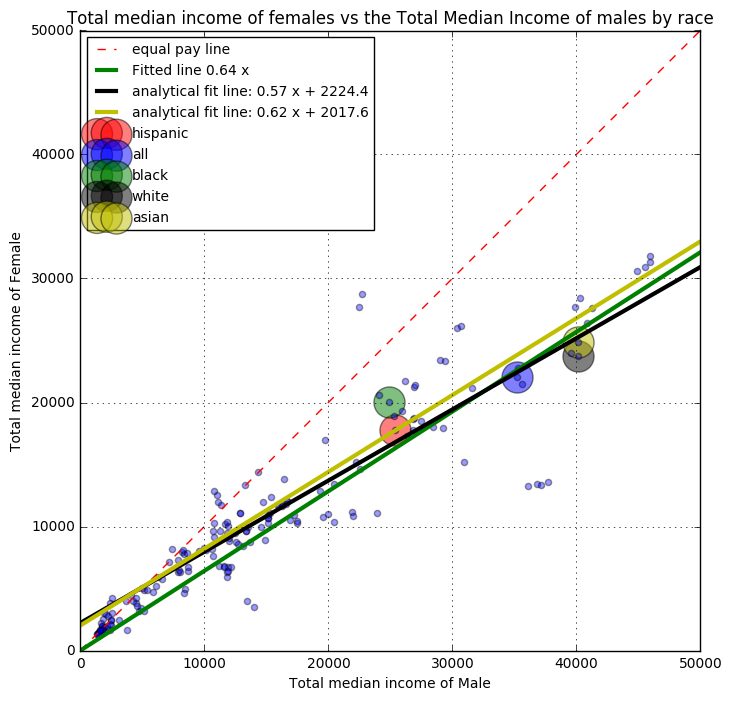

In [369]:
f, ax = plt.subplots(figsize = (8,8))

for i in range(5):
    plt.scatter(median_male[i], median_female[i], marker = "o", alpha = 0.5, s = 500, 
                c = list[i],label = allfemales.keys()[i] )
ax.set_xlabel("Total median income of Male")
ax.set_ylabel("Total median income of Female")
plt.ylim(0,50000)
plt.xlim(0,50000)

ax.plot([0,50000],[0,50000],"r--", label="equal pay line" )
ax.plot(x_new, modelfit.predict(x_new), "g-", linewidth= 3, label="Fitted line %.2f x"%modelfit.params )
pl.title("Total median income of females vs the Total Median Income of males by race")
pl.legend(loc=2)

#plot the all income data:
plt.scatter(all_males_allincomes, all_females_allincomes, c = "b", alpha = 0.4)


def line(beta,x):
    y = beta[0]+beta[1]*x
    return y
    
#analytical line
ax.plot(x_new, line(beta, x_new), "k",linewidth= 3,label="analytical fit line: " + "%.2f x + %.1f"%(beta[1], beta[0]))

#analytical line with mask to all data
ax.plot(x_new, line(beta_masked, x_new), "y-", linewidth= 3, 
        label="analytical fit line: " + "%.2f x + %.1f"%(beta_masked[1], beta_masked[0]))

ax.legend(loc=0,fontsize = 10)
pl.grid()


### From the graph with three fitted line and datapoints of all income data, we can conclude that the models are all close to each other. 

# 6. PREDICTION


### Since we have our fitted lines (models), we can predict what a woman in a position where a man recieves your ideal stipend would make based on three models



#### 1. analytic solution prediction from Total Median Income

In [378]:
#if the male pay is ideal
ideal_stipend = 98000
female_stipend = new_line(ideal_stipend, beta[0], beta[1])# prediction
print ("A man will make %d and a woman will make %d in the position, by analytic solution prediction for total median income"
       %(ideal_stipend, female_stipend))


A man will make 98000 and a woman will make 58471 in the position, by analytic solution prediction for total median income


#### 2. analytic solution prediction from All Income

In [379]:
female_stipend_0 = new_line(ideal_stipend, beta_masked[0],beta_masked[1])
print ("A man will make %d and a woman will make %d in the position, by analytic solution prediction for all income"
       %(ideal_stipend, female_stipend_0))

A man will make 98000 and a woman will make 62723 in the position, by analytic solution prediction for all income


#### 3. OLS solution prediction from Total Median Income

In [380]:
female_stipend_1 = ideal_stipend * modelfit.params
print ("A man will make %d and a woman will make %d in the position,by OLS prediction for total median income"
       %(ideal_stipend, female_stipend_1))

A man will make 98000 and a woman will make 62947 in the position,by OLS prediction for total median income


# 7. Comments on data

In [375]:
allmales['all']['Median income'].mean()
allmales['white']['Median income'].mean()

16682.088888888888

In [376]:
female_median= []
male_median= []
for k in ['all', 'white','black', 'hispanic', 'asian']:
    female_median.append(allfemales[k]['Median income'].median())
    male_median.append(allmales[k]['Median income'].median())
median = [female_median, male_median]

In [377]:
data = pd.DataFrame(median,index =["female", "male"], columns = ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian'])
data

,all,white,black,hispanic,asian
female,9507.5,9754.5,8733.0,6798.0,10346.0
male,13098.0,13975.0,12191.0,11558.0,11569.0


## To analyze income data from different races, between females and males. Interestingly, the gap of median income of Asian females and males seems the smallest. We can farther analyze the data to see if there is any linear regression between any two races, as well as look at other source of income. 